In [1]:
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objects as go

In [2]:
with open('backup/df_results.pkl', 'rb') as f:
    df = pickle.load(f)
df['Train'] = df['Train'].astype(str)
df['Umap'] = df['Umap'].astype(str)
df

Classifier                                               Umap  \
0      RandomForest                                              ['-']   
1               SVC                                              ['-']   
2               KNN                                              ['-']   
3      RandomForest                                              ['-']   
4               SVC                                              ['-']   
...             ...                                                ...   
11515           SVC  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11516           KNN  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11517  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11518           SVC  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11519           KNN  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   

                                                   Train         Test  \
0                                              ['KuHar']        KuHar   
1                                              ['KuHar']        KuHar   
2                                              ['KuHar']        KuHar   
3                                              ['KuHar']  MotionSense   
4                                              ['KuHar']  MotionSense   
...                                                  ...          ...   
11515  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...        WISDM   
11516  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...        WISDM   
11517  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...          UCI   
11518  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...          UCI   
11519  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...          UCI   

       accuracy - mean  accuracy - std  f1 score (weighted) - mean  \
0             0.768293        0.006029                    0.768886   
1             0.678862        0.000000                    0.678892   
2             0.747967        0.000000                    0.747640   
3             0.471795        0.006324                    0.465758   
4             0.392094        0.000000                    0.346528   
...                ...             ...                         ...   
11515         0.652369        0.000000                    0.687058   
11516         0.664822        0.000000                    0.701279   
11517         0.744262        0.006771                    0.742966   
11518         0.605067        0.000000                    0.584226   
11519         0.692996        0.000000                    0.694864   

       f1 score (weighted) - std  f1-score - mean - sit  \
0                       0.006274               0.831091   
1                       0.000000               0.792079   
2                       0.000000               0.800000   
3                       0.007534               0.519285   
4                       0.000000               0.562738   
...                          ...                    ...   
11515                   0.000000               0.681712   
11516                   0.000000               0.705882   
11517                   0.006830               0.644185   
11518                   0.000000               0.569832   
11519                   0.000000               0.547945   

       f1-score - mean - stand  ...  support - mean - stair down  \
0                     0.772338  ...                         41.0   
1                     0.666667  ...                         41.0   
2                     0.724638  ...                         41.0   
3                     0.656061  ...                        156.0   
4                     0.681440  ...                        156.0   
...                        ...  ...                          ...   
11515                 0.579323  ...                          NaN   
11516                 0.659227  ...                          NaN   
11517                 0.620960  ...                        126.0   
11518        

In [3]:
# df = pd.read_csv('backup/df_results.csv')
# df

In [4]:
datasets = df['Test'].unique()
datasets

array(['KuHar', 'MotionSense', 'WISDM', 'UCI'], dtype=object)

In [5]:
def boxplot(df, title, y):
    fig = go.Figure()
    for elem in y:
        fig.add_trace(go.Box(y=df[elem], name=elem))
    fig.update_layout(
        title=title,
        
    )
    fig.update_yaxes(range = [0., 1.])
    fig.show()

In [6]:
y = [
    'f1 score (weighted) - mean',
    'f1-score - mean - sit', 
    'f1-score - mean - stand',
    'f1-score - mean - walk', 
    'f1-score - mean - stair up',
    'f1-score - mean - stair down', 
    'f1-score - mean - run',
    'f1-score - mean - stair up and down'
]


## Obs: 

- The charts below show the dsitributiosns of f1 score mean (total and per class) with/without each test data on train data. Note that we can only calculate the metric score to classes that appear on test data.

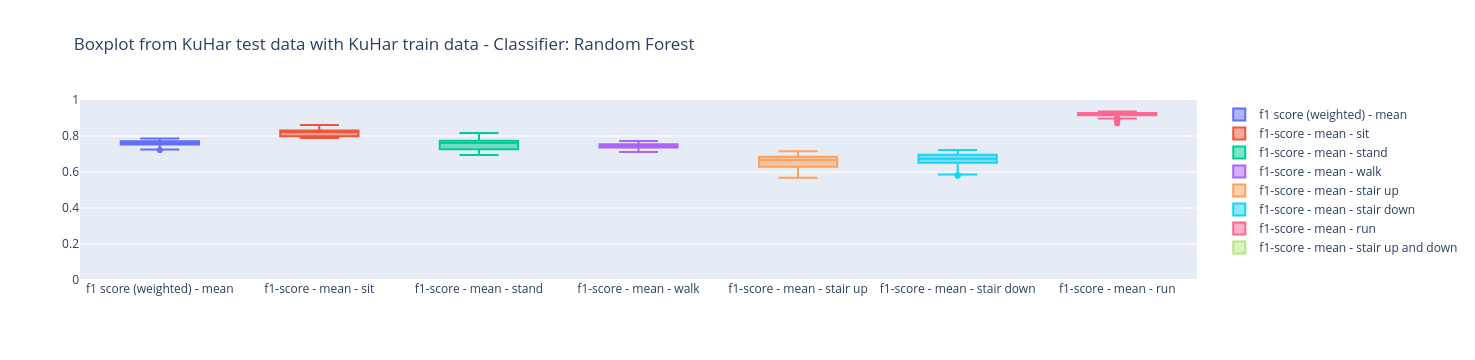

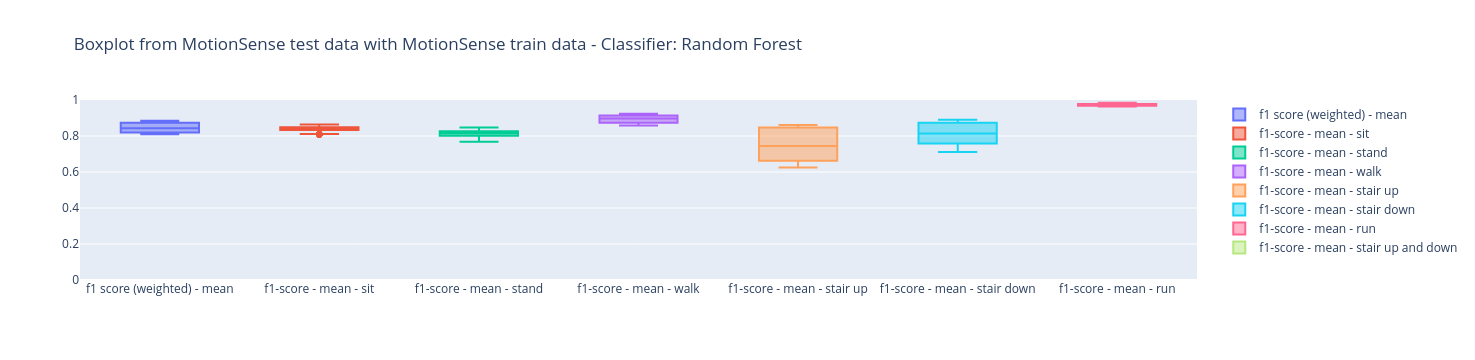

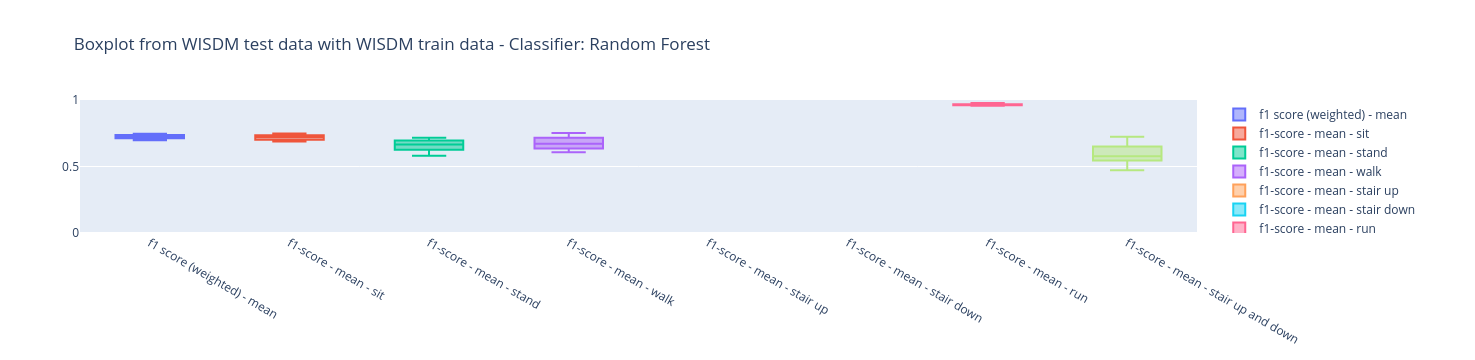

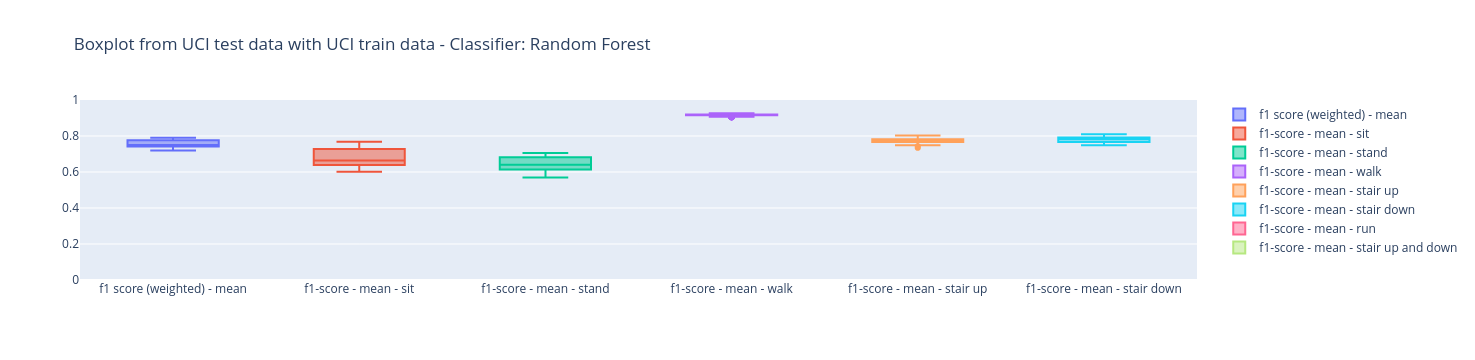

In [7]:
x = 'Test'
for data in datasets:

    train = [elem for elem in df['Train'].unique() if data in elem]
    new_df = df.loc[(df['Test'] == data) & (df['Classifier'] == 'RandomForest') & (df['Train'].isin(train)) & (df['Umap'] != "['-']")]
    title = f'Boxplot from {data} test data with {data} train data - Classifier: Random Forest'
    # title = f'Dataset: {data}'
    boxplot(new_df, title, y)

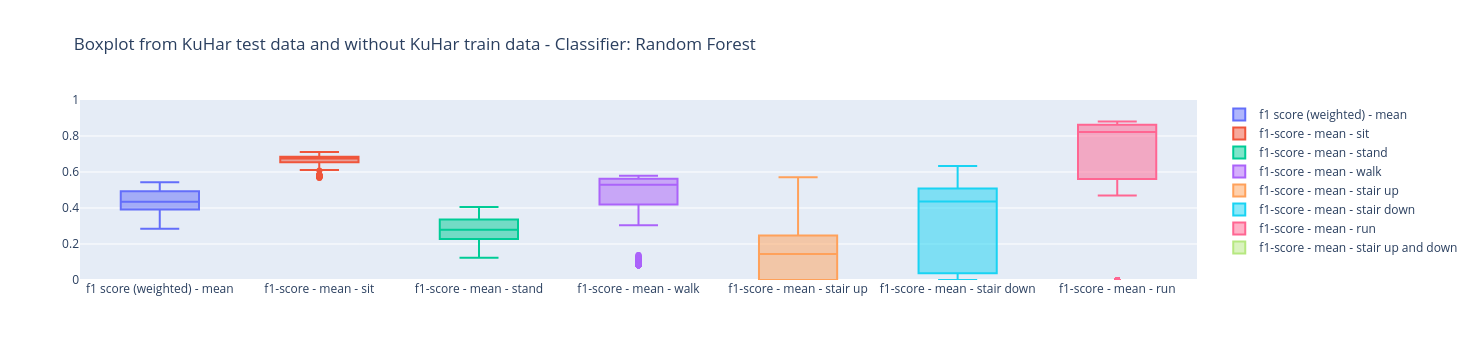

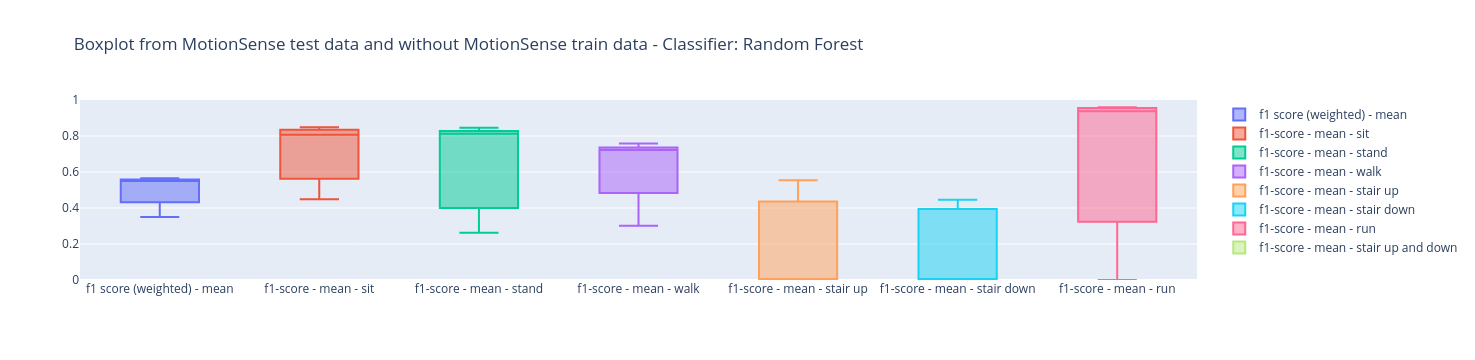

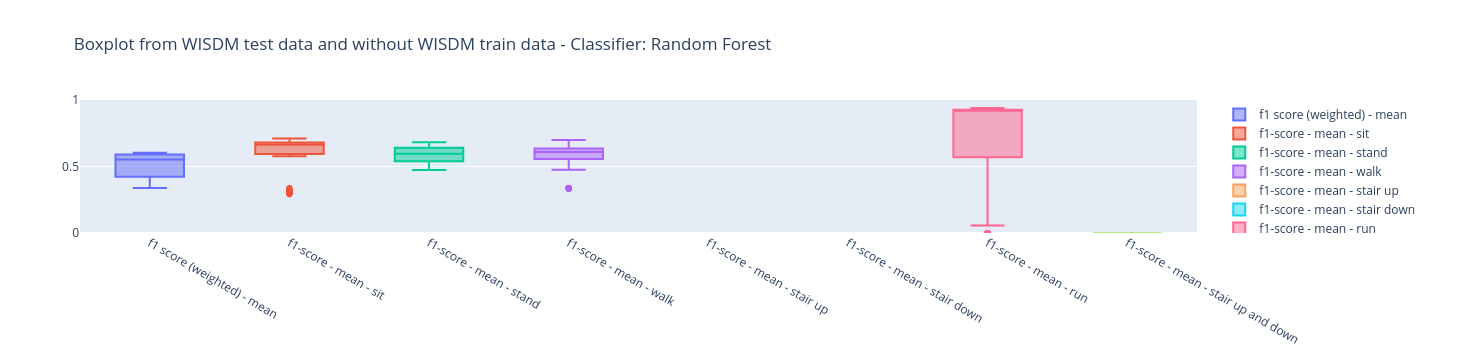

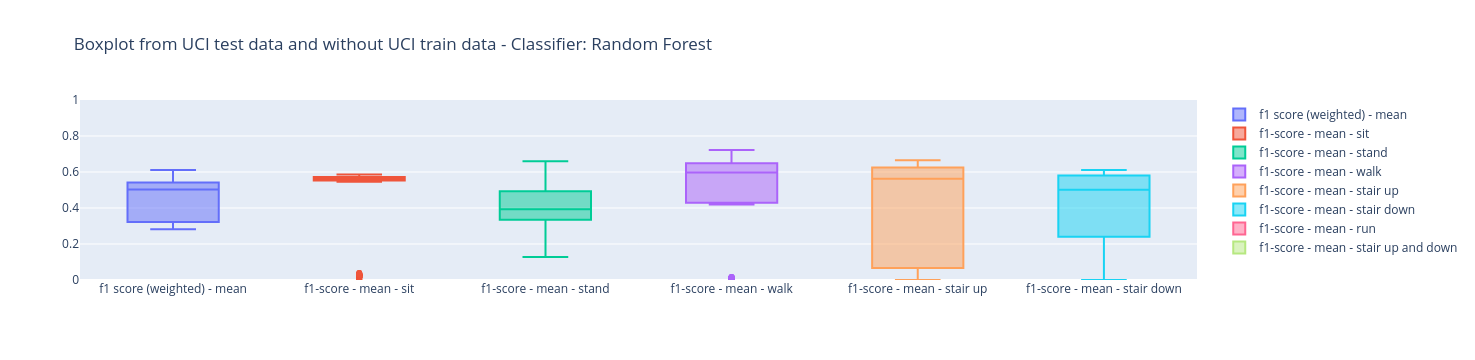

In [8]:
x = 'Test'
for data in datasets:

    train = [elem for elem in df['Train'].unique() if data not in elem]
    new_df = df.loc[(df['Test'] == data) & (df['Classifier'] == 'RandomForest') & (df['Train'].isin(train)) & (df['Umap'] != "['-']")]
    title = f'Boxplot from {data} test data and without {data} train data - Classifier: Random Forest'
    # title = f'Dataset: {data}'
    boxplot(new_df, title, y)

## Conclusions

1. When the test data don't appear on train data the score down.
2. Classes stair up/down have a terrible score sometimes (probably when WISDM appear on train data).
3. The best score when data appear on train and test and data was with MotionSense - 88.42\%.
4. The worst score when data appear on train and test and data was with WISDM - 69.80\%.
5. The best score when data appear only on test and data was with UCI-HAR and WISDM - 61\%.
6. The worst score when data appear only on test and data was with KuHar and UCI-HAR - 28\%.
7. When we test only with MotionSense and the run score is zero. It probably occurs because we haven't the class run on train data (We just have on train UCI or UCI and ExtraSensory). 

## Verifying the point 5 above

In [9]:
new_df = df.loc[(df['f1-score - mean - run'] == 0) & (df['Classifier'] == 'RandomForest') & (df['Umap'] != "['-']")]
new_df.iloc[:,:15]

Classifier                                               Umap  \
396    RandomForest                                          ['KuHar']   
399    RandomForest                                          ['KuHar']   
402    RandomForest                                          ['KuHar']   
504    RandomForest                                          ['KuHar']   
756    RandomForest                                    ['MotionSense']   
...             ...                                                ...   
11196  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11199  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11202  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11304  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   
11307  RandomForest  ['KuHar', 'MotionSense', 'ExtraSensory', 'WISD...   

                         Train         Test  accuracy - mean  accuracy - std  \
396                    ['UCI']        KuHar         0.408130        0.004146   
399                    ['UCI']  MotionSense         0.435150        0.004139   
402                    ['UCI']        WISDM         0.318782        0.002367   
504    ['ExtraSensory', 'UCI']        KuHar         0.364228        0.007317   
756                    ['UCI']        KuHar         0.405691        0.004378   
...                        ...          ...              ...             ...   
11196                  ['UCI']        KuHar         0.408130        0.006851   
11199                  ['UCI']  MotionSense         0.433013        0.006482   
11202                  ['UCI']        WISDM         0.320996        0.001524   
11304  ['ExtraSensory', 'UCI']        KuHar         0.385366        0.007882   
11307  ['ExtraSensory', 'UCI']  MotionSense         0.405556        0.003768   

       f1 score (weighted) - mean  f1 score (weighted) - std  \
396                      0.312687                   0.005937   
399                      0.383496                   0.004586   
402                      0.337589                   0.001989   
504                      0.289031                   0.009650   
756                      0.309838                   0.008184   
...                           ...                        ...   
11196                    0.313968                   0.013328   
11199                    0.380887                   0.007049   
11202                    0.340077                   0.001522   
11304                    0.314763                   0.006862   
11307                    0.355914                   0.003636   

       f1-score - mean - sit  f1-score - mean - stand  f1-score - mean - walk  \
396                 0.687400                 0.173070                0.456473   
399                 0.643093                 0.277712                0.439116   
402                 0.640898                 0.536431                0.476857   
504                 0.672578                 0.228491                0.303574   
756                 0.685775                 0.174829                0.451624   
...                      ...                      ...                     ...   
11196               0.686981                 0.181459                0.458198   
11199               0.640083                 0.269332                0.436998   
11202               0.645663                 0.541889                0.478823   
11304               0.655057                 0.225583                0.337700   
11307               0.665498                 0.294250                0.468983   

       f1-score - mean - stair up  f1-score - mean - stair down  \
396                      0.140710                      0.418468   
399                      0.548114                      0.392944   
402                           NaN                           NaN   
504                      0.087622                      0.441921   
756                      0.128125                      0.418674   
...            

In [10]:
 new_df['Train'].unique()

array(["['UCI']", "['ExtraSensory', 'UCI']"], dtype=object)

## Questions

- Make sense use f1-score or accuracy for crossDatasets? 
- Is f1-score mean is a good metric to evaluate the experiment? 
  - R: No, we need look to f1-score per class.